### Loading Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
#Black and White Source files
#uncloured traing set
file1 = r'C:\Users\Admin\Downloads\train_batch1.pkl'
uncloured_data_batch_1 = unpickle(file1)
file2 = r'C:\Users\Admin\Downloads\train_batch2.pkl'
uncloured_data_batch_2 = unpickle(file2)
file3 = r'C:\Users\Admin\Downloads\train_batch3.pkl'
uncloured_data_batch_3 = unpickle(file3)
file4 = r'C:\Users\Admin\Downloads\train_batch4.pkl'
uncloured_data_batch_4 = unpickle(file4)
file5 = r'C:\Users\Admin\Downloads\train_batch5.pkl'
uncloured_data_batch_5 = unpickle(file5)

#uncoloured test set
file6=r'C:\Users\Admin\Downloads\test_batch1.pkl'
uncloured_test_batch = unpickle(file6)

In [4]:
#Concating the data into a list to put them together as 1 dataset
concat_data_batch = pd.concat([uncloured_data_batch_1, uncloured_data_batch_2, uncloured_data_batch_3, uncloured_data_batch_4, uncloured_data_batch_5])

In [5]:
concat_data_batch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Columns: 1025 entries, 0 to label
dtypes: uint8(1025)
memory usage: 49.3 MB


In [6]:
uncloured_test_batch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1025 entries, 0 to label
dtypes: uint8(1025)
memory usage: 9.8 MB


In [7]:
#Putting the label column into a list
label_column = concat_data_batch[concat_data_batch.columns[-1:]]
label_numpy = label_column.to_numpy()

In [10]:
#Putting the data column into a numpy array
data_column = concat_data_batch[concat_data_batch.columns[:-1]]
data_numpy = data_column.to_numpy()

In [11]:
data_numpy

array([[ 61,  45,  48, ..., 189, 124,  99],
       [171, 134, 103, ..., 137, 138, 137],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [142, 143, 143, ...,  47,  39,  27],
       [208, 205, 204, ..., 186, 189, 189],
       [230, 238, 237, ..., 177, 164, 163]], dtype=uint8)

In [12]:
#Putting the data into a dictionary
uncloured_data_batch_dict = {'labels':label_numpy, 'data':data_numpy }

In [13]:
# Converting the test data into numpy and putting them into a dictionary
test_label_column = uncloured_test_batch[uncloured_test_batch.columns[-1:]]
test_label_numpy = test_label_column.to_numpy()

test_data_column = uncloured_test_batch[uncloured_test_batch.columns[:-1]]
test_data_numpy = test_data_column.to_numpy()

uncloured_test_dict = {'labels':test_label_numpy, 'data':test_data_numpy }

In [14]:
#Colored Source file
import tarfile
tar = tarfile.open('cifar-10-python.tar.gz', "r:gz")
tar.extractall()
tar.close()
for i in tar:
    print(i)

<TarInfo 'cifar-10-batches-py' at 0x1a9c6f3eac0>
<TarInfo 'cifar-10-batches-py/data_batch_4' at 0x1a9c6f961c0>
<TarInfo 'cifar-10-batches-py/readme.html' at 0x1a9c6f3ed00>
<TarInfo 'cifar-10-batches-py/test_batch' at 0x1a9c6f96280>
<TarInfo 'cifar-10-batches-py/data_batch_3' at 0x1a9c6f96340>
<TarInfo 'cifar-10-batches-py/batches.meta' at 0x1a9c6f96400>
<TarInfo 'cifar-10-batches-py/data_batch_2' at 0x1a9c6f96580>
<TarInfo 'cifar-10-batches-py/data_batch_5' at 0x1a9c6f964c0>
<TarInfo 'cifar-10-batches-py/data_batch_1' at 0x1a9c6f96700>


In [15]:
coloured_train_batch1 = unpickle('cifar-10-batches-py/data_batch_1')
coloured_train_batch2 = unpickle('cifar-10-batches-py/data_batch_2')
coloured_train_batch3 = unpickle('cifar-10-batches-py/data_batch_3')
coloured_train_batch4 = unpickle('cifar-10-batches-py/data_batch_4')
coloured_train_batch5 = unpickle('cifar-10-batches-py/data_batch_5')

coloured_test_batch = unpickle('cifar-10-batches-py/test_batch')

In [16]:
coloured_x_data_temp = []
coloured_y_data_temp = []
coloured_x_test_data_temp=[]
coloured_y_test_data_temp = []

coloured_x_data_temp.append(coloured_train_batch1[b'data'])
coloured_y_data_temp.append(coloured_train_batch1[b'labels'])
coloured_x_data_temp.append(coloured_train_batch2[b'data'])
coloured_y_data_temp.append(coloured_train_batch2[b'labels'])
coloured_x_data_temp.append(coloured_train_batch3[b'data'])
coloured_y_data_temp.append(coloured_train_batch3[b'labels'])
coloured_x_data_temp.append(coloured_train_batch4[b'data'])
coloured_y_data_temp.append(coloured_train_batch4[b'labels'])
coloured_x_data_temp.append(coloured_train_batch5[b'data'])
coloured_y_data_temp.append(coloured_train_batch5[b'labels'])
coloured_x_data = np.array(coloured_x_data_temp)
coloured_y_data = np.array(coloured_y_data_temp)

coloured_x_test_data_temp.append(coloured_test_batch[b'data'])
coloured_y_test_data_temp.append(coloured_test_batch[b'labels'])
coloured_x_test_data = np.array(coloured_x_test_data_temp)
coloured_y_test_data = np.array(coloured_y_test_data_temp)


## Part 1 - Input Dataset

### EDA(Exploratory Data Analysis) for uncoloured file 

In [17]:
concat_data_batch.groupby(['label'])['label'].count()

label
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: label, dtype: int64

In [18]:
uncloured_data_batch_dict['data']

array([[ 61,  45,  48, ..., 189, 124,  99],
       [171, 134, 103, ..., 137, 138, 137],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [142, 143, 143, ...,  47,  39,  27],
       [208, 205, 204, ..., 186, 189, 189],
       [230, 238, 237, ..., 177, 164, 163]], dtype=uint8)

In [19]:
#The data is a single dimension array, therefore I need to reshape it
uncloured_image = uncloured_data_batch_dict['data'][0]
uncloured_image2 = uncloured_image.reshape(1,32,32)
uncloured_image2

array([[[ 61,  45,  48, ..., 137, 130, 129],
        [ 19,   0,  10, ...,  95,  90,  94],
        [ 24,   9,  31, ...,  90,  91,  80],
        ...,
        [173, 154, 157, ..., 134,  36,  38],
        [146, 129, 144, ..., 153,  69,  60],
        [151, 137, 147, ..., 189, 124,  99]]], dtype=uint8)

In [20]:
uncloured_image2.shape

(1, 32, 32)

In [21]:
uncoloured_X_train = uncloured_data_batch_dict['data']
uncoloured_y_train = uncloured_data_batch_dict['labels']

uncoloured_X_test = uncloured_test_dict['data']
uncoloured_y_test = uncloured_test_dict['labels']

In [22]:
uncoloured_y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [23]:
uncoloured_X_train.shape

(50000, 1024)

In [24]:
uncoloured_y_train.shape

(50000, 1)

In [25]:
uncoloured_y_train = uncoloured_y_train.reshape(uncoloured_y_train.shape[0] * uncoloured_y_train.shape[1])
uncoloured_y_test = uncoloured_y_test.reshape(uncoloured_y_test.shape[0] * uncoloured_y_test.shape[1])

In [26]:
print("Shape before reshape:", uncoloured_X_train.shape)
# Reshape the whole image data; Since it is black and white image, it will be 1,32,32
uncoloured_X_train = uncoloured_X_train.reshape(len(uncoloured_X_train),1,32,32)
print("Shape after reshape and before transpose:", uncoloured_X_train.shape)
# Transpose the whole data
uncoloured_X_train = uncoloured_X_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", uncoloured_X_train.shape)

Shape before reshape: (50000, 1024)
Shape after reshape and before transpose: (50000, 1, 32, 32)
Shape after reshape and transpose: (50000, 32, 32, 1)


In [27]:
uncoloured_X_train

array([[[[ 61],
         [ 45],
         [ 48],
         ...,
         [137],
         [130],
         [129]],

        [[ 19],
         [  0],
         [ 10],
         ...,
         [ 95],
         [ 90],
         [ 94]],

        [[ 24],
         [  9],
         [ 31],
         ...,
         [ 90],
         [ 91],
         [ 80]],

        ...,

        [[173],
         [154],
         [157],
         ...,
         [134],
         [ 36],
         [ 38]],

        [[146],
         [129],
         [144],
         ...,
         [153],
         [ 69],
         [ 60]],

        [[151],
         [137],
         [147],
         ...,
         [189],
         [124],
         [ 99]]],


       [[[171],
         [134],
         [103],
         ...,
         [ 91],
         [ 87],
         [ 79]],

        [[155],
         [151],
         [124],
         ...,
         [ 96],
         [ 77],
         [ 71]],

        [[152],
         [144],
         [115],
         ...,
         [ 79],
         [

In [28]:
# Doing the same thing for the test dataset 
uncoloured_X_test = uncoloured_X_test.reshape(len(uncoloured_X_test),1,32,32)
#output (10000,1,32,32) need to change it to (10000,32,32,1)
uncoloured_X_test = uncoloured_X_test.transpose(0,2,3,1)

Performing Data Normalization to eliminate redundant data and minimize data modification errors

In [29]:
uncoloured_X_train2 = uncoloured_X_train.astype('float32')
uncoloured_X_test2 = uncoloured_X_test.astype('float32')

from keras.utils.np_utils import to_categorical
uncoloured_y_train2 = to_categorical(uncoloured_y_train, num_classes=10)
uncoloured_y_test2 = to_categorical(uncoloured_y_test, num_classes=10)

uncoloured_X_train2 /= 255
uncoloured_X_test2 /=255

In [31]:
uncoloured_y_train2.shape

(50000, 10)

Examples Of Image 1
Image - Min value:0.0 , Max Value:0
Shape: (32, 32, 1)
Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


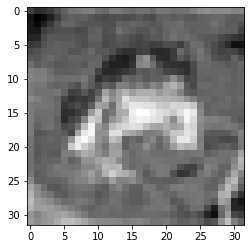

In [24]:
#printing image 1 as well as its min max value and label
import matplotlib.pyplot as plt

# take first image
uncoloured_image = uncoloured_X_train2[0]
# take first image label index
uncoloured_label = uncoloured_y_train2[0]
# Display the image
plt.imshow(uncoloured_image, cmap='gray')
plt.grid(False)
print('Examples Of Image 1')
print('Image - Min value:%s , Max Value:%d' %(np.min(uncoloured_image), np.max(uncoloured_image)))
print('Shape:', uncoloured_image.shape)
print('Label:', uncoloured_label)
plt.show()

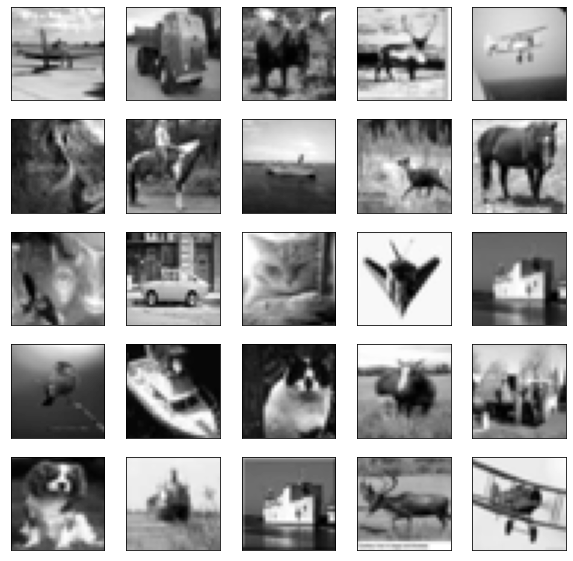

In [24]:
uncloured_images = uncoloured_X_train2
uncloured_labels = uncoloured_y_train2


# dispaly random images
# define row and column of figure
rows, columns = 5, 5
# take random image idex id
uncloured_imageId = np.random.randint(0, len(uncloured_images), rows * columns)
# take images for above random image ids
uncloured_images = uncloured_images[uncloured_imageId]
# take labels for these images only
uncloured_labels = [uncloured_labels[i] for i in uncloured_imageId]

# define figure
fig=plt.figure(figsize=(10, 10))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(uncloured_images[i-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### Codes for coloured files

In [55]:
coloured_x_test_data.shape

(1, 10000, 3072)

In [56]:
coloured_y_test_data.shape

(1, 10000)

In [57]:
coloured_y_data.shape

(5, 10000)

In [82]:
#I have to reshape the x and y data test and train data

coloured_X_train = coloured_x_data.reshape(coloured_x_data.shape[0] * coloured_x_data.shape[1], coloured_x_data.shape[2])
coloured_y_train = coloured_y_data.reshape(coloured_y_data.shape[0] * coloured_y_data.shape[1])

coloured_X_test = coloured_x_test_data.reshape(coloured_x_test_data.shape[0] * coloured_x_test_data.shape[1], coloured_x_test_data.shape[2])
coloured_y_test = coloured_y_test_data.reshape(coloured_y_test_data.shape[0] * coloured_y_test_data.shape[1])


In [83]:
coloured_X_train.shape

(50000, 3072)

In [84]:
coloured_y_train.shape

(50000,)

In [85]:
coloured_y_train

array([6, 9, 9, ..., 9, 1, 1])

In [88]:
print("Shape before reshape:", coloured_X_train.shape)
# Reshape the whole image data; Since it has colour now, it will be 3,32,32 instead of 1,32,32
coloured_X_train = coloured_X_train.reshape(len(coloured_X_train),3,32,32)
print("Shape after reshape and before transpose:", coloured_X_train.shape)
# Transpose the whole data
coloured_X_train = coloured_X_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", coloured_X_train.shape)

Shape before reshape: (50000, 3072)
Shape after reshape and before transpose: (50000, 3, 32, 32)
Shape after reshape and transpose: (50000, 32, 32, 3)


In [89]:
coloured_X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [64]:
coloured_X_test = coloured_X_test.reshape(len(coloured_X_test),3,32,32)
coloured_X_test = coloured_X_test.transpose(0,2,3,1)

In [65]:
coloured_X_train2 = coloured_X_train.astype('float32')
coloured_X_test2 = coloured_X_test.astype('float32')

from keras.utils.np_utils import to_categorical
coloured_y_train2 = to_categorical(coloured_y_train, num_classes=10)
coloured_y_test2 = to_categorical(coloured_y_test, num_classes=10)

In [66]:
coloured_y_train2.shape

(50000, 10)

In [67]:
coloured_X_train2 /= 255
coloured_X_test2 /=255

Examples Of Image 1
Image - Min value:0.0 , Max Value:1
Shape: (32, 32, 3)
Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


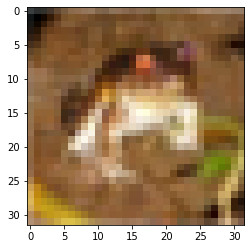

In [73]:
from matplotlib import pyplot as plt
# take first image
coloured_image = coloured_X_train2[0]
# take first image label index
coloured_label = coloured_y_train2[0]
# Display the image
print('Examples Of Image 1')
print('Image - Min value:%s , Max Value:%d' %(np.min(coloured_image), np.max(coloured_image)))
print('Shape:', coloured_image.shape)
print('Label:', coloured_label)
plt.imshow(coloured_image)

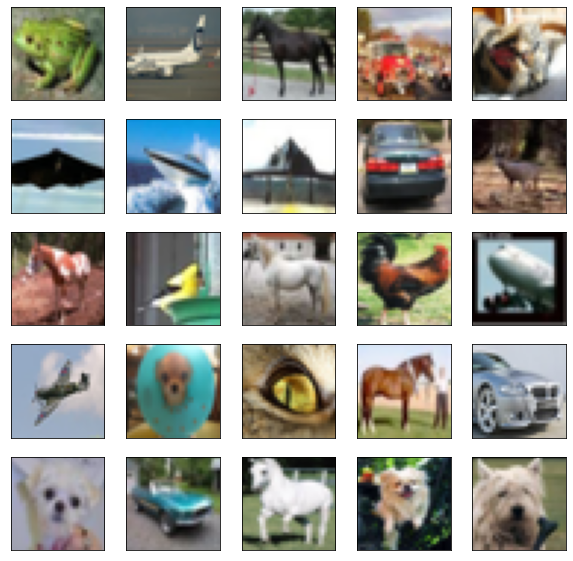

In [74]:
# take the images data 
cloured_images = coloured_X_train2
cloured_labels = coloured_y_train2
# label names of the images


# dispaly random images
# define row and column of figure
rows, columns = 5, 5
# take random image idex id
cloured_imageId = np.random.randint(0, len(cloured_images), rows * columns)
# take images for above random image ids
cloured_images = cloured_images[cloured_imageId]
# take labels for these images only
cloured_labels = [cloured_labels[i] for i in cloured_imageId]

# define figure
fig=plt.figure(figsize=(10, 10))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cloured_images[i-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [75]:
#Grayscale to convert coloured to gray data
def grayscale(data, dtype='float32'):
    r = np.asarray(.3, dtype=dtype)
    g = np.asarray(.59, dtype=dtype)
    b = np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    rst = np.expand_dims(rst, axis=3)
    return rst

#Convert the first 50 colour training to black and white
coloured_X_train_gray = grayscale(coloured_X_train2[0:50])
coloured_X_test_gray = grayscale(coloured_X_test2[0:50])

Examples Of Image 50
Image - Min value:0.01627451 , Max Value:1
Shape: (32, 32, 1)
Label: 0


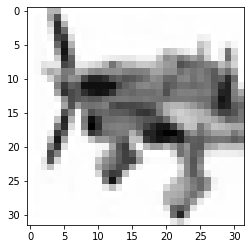

In [76]:
#Displaying image no 50


coloured_image_gray = coloured_X_train_gray[49]
# take 50th image label index
coloured_label_gray = coloured_y_train[49]
# Display the image
plt.imshow(coloured_image_gray, cmap='gray')
plt.grid(False)
print('Examples Of Image 50')
print('Image - Min value:%s , Max Value:%d' %(np.min(coloured_image_gray), np.max(coloured_image_gray)))
print('Shape:', coloured_image_gray.shape)
print('Label:', coloured_label_gray)
plt.show()

In [77]:
coloured_X_train_gray

array([[[[0.24003921],
         [0.17643139],
         [0.18843138],
         ...,
         [0.5378823 ],
         [0.5120392 ],
         [0.50545096]],

        [[0.07372549],
         [0.        ],
         [0.03968628],
         ...,
         [0.37203923],
         [0.35360783],
         [0.36941177]],

        [[0.094     ],
         [0.03501961],
         [0.12356863],
         ...,
         [0.35474512],
         [0.35709804],
         [0.3152549 ]],

        ...,

        [[0.679451  ],
         [0.6051373 ],
         [0.6166667 ],
         ...,
         [0.5261569 ],
         [0.14062744],
         [0.14964706]],

        [[0.57478434],
         [0.5062353 ],
         [0.56494117],
         ...,
         [0.599451  ],
         [0.2722353 ],
         [0.23494117]],

        [[0.591451  ],
         [0.5366667 ],
         [0.57666665],
         ...,
         [0.7402353 ],
         [0.48690197],
         [0.38862744]]],


       [[[0.67137253],
         [0.5238823 ],
         [0.40

### Comparing first 50 pictures

In [52]:
#First 50 images of black and white source file
uncoloured_X_train_compar = uncoloured_X_train2[0:50]

In [49]:
# Comparing the similarity of black and white image and grayscaled image
import cv2
i=0
height = 30
width = 30
def similarity(image1, image2):
    errorL2 = cv2.norm(uncoloured_X_train_compar[0], coloured_X_train_gray[0], cv2.NORM_L2 )
    similarity = 1 - errorL2 / ( height * width )
    return similarity

def compare_images(image1, image2):
    # compute the mean squared error and structural similarity
    # index for the images
    s = similarity(image1, image2)
    # setup the figure
    print('Figure',i)
    print(("Similarity= %.2f" % (s)))

for i in range(50): 
    compare_images(uncoloured_X_train_compar[i],coloured_X_train_gray[i])
    i+=1

Figure 0
Similarity= 1.00
Figure 1
Similarity= 1.00
Figure 2
Similarity= 1.00
Figure 3
Similarity= 1.00
Figure 4
Similarity= 1.00
Figure 5
Similarity= 1.00
Figure 6
Similarity= 1.00
Figure 7
Similarity= 1.00
Figure 8
Similarity= 1.00
Figure 9
Similarity= 1.00
Figure 10
Similarity= 1.00
Figure 11
Similarity= 1.00
Figure 12
Similarity= 1.00
Figure 13
Similarity= 1.00
Figure 14
Similarity= 1.00
Figure 15
Similarity= 1.00
Figure 16
Similarity= 1.00
Figure 17
Similarity= 1.00
Figure 18
Similarity= 1.00
Figure 19
Similarity= 1.00
Figure 20
Similarity= 1.00
Figure 21
Similarity= 1.00
Figure 22
Similarity= 1.00
Figure 23
Similarity= 1.00
Figure 24
Similarity= 1.00
Figure 25
Similarity= 1.00
Figure 26
Similarity= 1.00
Figure 27
Similarity= 1.00
Figure 28
Similarity= 1.00
Figure 29
Similarity= 1.00
Figure 30
Similarity= 1.00
Figure 31
Similarity= 1.00
Figure 32
Similarity= 1.00
Figure 33
Similarity= 1.00
Figure 34
Similarity= 1.00
Figure 35
Similarity= 1.00
Figure 36
Similarity= 1.00
Figure 37
S

After comparing similarity,I have decided to compare their Mean Squared Error just to double confirm it is correct. 

In [45]:
i=0
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    return err
def compare_images(imageA, imageB):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    # setup the figure
    print('Figure',i)
    print(("MSE: %.2f" % (m)))

for i in range(50): 
    compare_images(uncoloured_X_train_compar[i],coloured_X_train_gray[i])
    i+=1

Figure 0
MSE: 0.00
Figure 1
MSE: 0.00
Figure 2
MSE: 0.00
Figure 3
MSE: 0.00
Figure 4
MSE: 0.00
Figure 5
MSE: 0.00
Figure 6
MSE: 0.00
Figure 7
MSE: 0.00
Figure 8
MSE: 0.00
Figure 9
MSE: 0.00
Figure 10
MSE: 0.00
Figure 11
MSE: 0.00
Figure 12
MSE: 0.00
Figure 13
MSE: 0.00
Figure 14
MSE: 0.00
Figure 15
MSE: 0.00
Figure 16
MSE: 0.00
Figure 17
MSE: 0.00
Figure 18
MSE: 0.00
Figure 19
MSE: 0.00
Figure 20
MSE: 0.00
Figure 21
MSE: 0.00
Figure 22
MSE: 0.00
Figure 23
MSE: 0.00
Figure 24
MSE: 0.00
Figure 25
MSE: 0.00
Figure 26
MSE: 0.00
Figure 27
MSE: 0.00
Figure 28
MSE: 0.00
Figure 29
MSE: 0.00
Figure 30
MSE: 0.00
Figure 31
MSE: 0.00
Figure 32
MSE: 0.00
Figure 33
MSE: 0.00
Figure 34
MSE: 0.00
Figure 35
MSE: 0.00
Figure 36
MSE: 0.00
Figure 37
MSE: 0.00
Figure 38
MSE: 0.00
Figure 39
MSE: 0.00
Figure 40
MSE: 0.00
Figure 41
MSE: 0.00
Figure 42
MSE: 0.00
Figure 43
MSE: 0.00
Figure 44
MSE: 0.00
Figure 45
MSE: 0.00
Figure 46
MSE: 0.00
Figure 47
MSE: 0.00
Figure 48
MSE: 0.00
Figure 49
MSE: 0.00


## Part 2 - Machine Learning

In [47]:
uncoloured_X_train2.shape

(50000, 32, 32, 1)

In [48]:
# In order to fit into the Machine learning model, I have to undo my transpose and reshape for my datas. 

print("Shape before reshape:", uncoloured_X_train2.shape)
# Transpose the whole data
uncoloured_X_train3 = uncoloured_X_train2.transpose(0,3,2,1)
print("Shape after transpose and before reshape:", uncoloured_X_train3.shape)
# Reshape the whole image data
uncoloured_X_train3 = uncoloured_X_train3.reshape(len(uncoloured_X_train3),1024)
print("Shape after transpose and reshape:", uncoloured_X_train3.shape)

Shape before reshape: (50000, 32, 32, 1)
Shape after transpose and before reshape: (50000, 1, 32, 32)
Shape after transpose and reshape: (50000, 1024)


In [49]:
# Transpose the whole data
uncoloured_X_test3 = uncoloured_X_test2.transpose(0,3,2,1)
# Reshape the whole image data
uncoloured_X_test3 = uncoloured_X_test3.reshape(len(uncoloured_X_test2),1024)
print("Shape after transpose and reshape:", uncoloured_X_test3.shape)

Shape after transpose and reshape: (10000, 1024)


In [50]:
uncoloured_y_train2.shape

(50000, 10)

In [51]:
target_names = ['label 0', 'label 1', 'label 2', 'label 3', 'label 4', 'label 5', 'label 6', 'label 7', 'label 8', 'label 9']

In [52]:
X_train, X_test, y_train, y_test = uncoloured_X_train3, uncoloured_X_test3, uncoloured_y_train, coloured_y_test

In [53]:
from sklearn.linear_model import LogisticRegression
# print y_train to recap how it looks like
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train) # y_train, not y_train_5

C:\Users\Admin\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [54]:
from sklearn.metrics import accuracy_score
LR_y_pred = log_reg.predict(X_test)
LR_score = accuracy_score(y_test,LR_y_pred)
print("Accuracy Score:")
print(LR_score)

Accuracy Score:
0.2789


In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Logistic Regression:")

print("Confusion Matrix:")
print(confusion_matrix(y_test, LR_y_pred))

print('')

print("Classification Report")
print(classification_report(y_test, LR_y_pred, target_names=target_names))

Logistic Regression:
Confusion Matrix:
[[308  55  93  43  58  66  52  95 161  69]
 [ 48 350  29  44  44  27  89  64  97 208]
 [135  52 191 114 111  70 126  90  74  37]
 [ 79  70 100 153  93 176 116  84  67  62]
 [ 88  45 126  87 177 114 146 119  53  45]
 [ 80  36 104  88  98 289  99  84  82  40]
 [ 73  97  78 114  87 103 261  64  56  67]
 [ 65  51 104  65 112  78  72 265 103  85]
 [111 100  31  44  17  75  47  57 381 137]
 [ 35 199  30  28  38  27  47  60 122 414]]

Classification Report
              precision    recall  f1-score   support

     label 0       0.30      0.31      0.30      1000
     label 1       0.33      0.35      0.34      1000
     label 2       0.22      0.19      0.20      1000
     label 3       0.20      0.15      0.17      1000
     label 4       0.21      0.18      0.19      1000
     label 5       0.28      0.29      0.29      1000
     label 6       0.25      0.26      0.25      1000
     label 7       0.27      0.27      0.27      1000
     label 8       0

In [56]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
rf_y_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test,rf_y_pred)
print("Accuracy Score:")
print(rf_score)

Accuracy Score:
0.4152


In [58]:
print("Accuracy Score:")

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

print('')

print("Classification Report")
print(classification_report(y_test, rf_y_pred, target_names=target_names))

Accuracy Score:
Confusion Matrix:
[[443  25 111  23  76  21  47  43 167  44]
 [ 30 494  21  31  32  23  68  39  69 193]
 [ 84  45 346  77 137  64 116  55  42  34]
 [ 61  48  79 238  99 148 128  84  33  82]
 [ 61  29 167  51 364  48 114  84  57  25]
 [ 56  30 104 127  77 353  83  92  41  37]
 [ 30  69  90  70 123  56 443  40  29  50]
 [ 45  49  63  73 109  73  42 406  45  95]
 [ 80  78  29  27  36  53  23  32 564  78]
 [ 42 190  24  21  23  19  43  42  95 501]]

Classification Report
              precision    recall  f1-score   support

     label 0       0.48      0.44      0.46      1000
     label 1       0.47      0.49      0.48      1000
     label 2       0.33      0.35      0.34      1000
     label 3       0.32      0.24      0.27      1000
     label 4       0.34      0.36      0.35      1000
     label 5       0.41      0.35      0.38      1000
     label 6       0.40      0.44      0.42      1000
     label 7       0.44      0.41      0.42      1000
     label 8       0.49  

As you can see, random forest has better accuracy, precision, recall and f1-score compared to logistic regression. Hence I will use random forest to do gridsearch in order to improve my accuracy

### Grid Search CV

In [58]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [59]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [61]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [62]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [363]:
CV_rfc.best_index_

25

In [64]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [65]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [66]:
rfc1_y_pred = rfc1.predict(X_test)
rfc1_score = accuracy_score(y_test,rfc1_y_pred)
print("Accuracy Score:")
print(rfc1_score)

Accuracy Score:
0.3472


In [362]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_accuracy = evaluate(rf, X_test, y_test)

best_random = CV_rfc.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 2.1491 degrees.
Accuracy = 0.42%.
Model Performance
Average Error: 2.3897 degrees.
Accuracy = 0.35%.
Improvement of -16.38%.


As you can see, this is the first time I did grid search, I used random parameters and values which caused the accuracy to be worst. This model ran for roughly 10 hours which made me regret not researching more on how to find good values and parameters. 

### Grid Search CV Method 2

Therefore, In order to not make the same mistake, I researched more and found out that I can find what parameters to use and the range of values through doing randomized search

#### Doing RandomizedSearchCV

In [356]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [364]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [365]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [366]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_accuracy = evaluate(rf, X_test, y_test)

best_random2 = rf_random.best_estimator_
random_accuracy = evaluate(best_random2, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 2.1491 degrees.
Accuracy = 0.42%.
Model Performance
Average Error: 2.0293 degrees.
Accuracy = 0.45%.
Improvement of 8.57%.


As you can see, with RandomizedSearchCV function, we have a improve of 8.57%. We can further imrpove the result by using GridSearchCV to focus on some hyperparameters ranges found in the random search. 

#### Doing GridSearchCV

I didnt use all the parameters because I tried using all of them but it ran for around 5 days and I decided to stop it because it was a complete waste of time. Letting it continue run was not the right way, I decided to use the first method I did earlier on top which is 4 parameters. I know that using 4 parameters and similar number of values will run for 10 hours only, hence I followed number of parameters and values from the first method. 

In [59]:
param_grid3 = { 
    'n_estimators': [1300, 1700],
    'max_features': ['auto'],
    'max_depth' : [110, 130],
    'bootstrap': [False]
}

In [60]:
grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid3, cv= 5)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False], 'max_depth': [110, 130],
                         'max_features': ['auto'],
                         'n_estimators': [1300, 1700]})

In [61]:
grid_search2.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'auto',
 'n_estimators': 1700}

In [62]:
grid_rfc=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 1700, max_depth=110, bootstrap=False)

In [63]:
grid_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=110, n_estimators=1700,
                       random_state=42)

In [65]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_accuracy = evaluate(rf, X_test, y_test)

best_random = grid_search2.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 2.1491 degrees.
Accuracy = 0.42%.
Model Performance
Average Error: 2.0262 degrees.
Accuracy = 0.45%.
Improvement of 8.86%.


As expected, this grid search ran for around 12 hours and you can see there is an improve of 8.86% compared to the randomized search of 8.57%. Maybe if i used more values and parameters to run it the improvement will be better but in order to save time and my computer cannot handle the high computation, I decided to keep it simple. 

## Part 3 - Deep Learning

In [92]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow import random
from keras.layers import Activation
from keras.layers import Dropout
import seaborn as sb
from keras.layers import BatchNormalization

### CNN for Black and White dataset

In [120]:
# Initialising the CNN
model = Sequential()

In [32]:
X_train2, X_test2, y_train2, y_test2 = uncoloured_X_train2, uncoloured_X_test2, uncoloured_y_train2, uncoloured_y_test2

In [33]:
X_train2.shape

(50000, 32, 32, 1)

In [34]:
y_train2.shape

(50000, 10)

In [122]:
#  Convolution + padding


model.add(Conv2D(32, (3, 3), input_shape = (32,32,1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
model.add(Flatten())

# Full ANN Connection
#model.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))

# output activation depends on the number of output classes
model.add(Dense(units = 10, activation = 'softmax'))

In [123]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2, 64)        

In [124]:
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [125]:
batch_size = 32
m1=model.fit(X_train2, y_train2,
          batch_size=batch_size,
          epochs=50,
          validation_data=(X_test2, y_test2),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7199 - accuracy: 0.3816 - val_loss: 1.4024 - val_accuracy: 0.5011
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3309 - accuracy: 0.5359 - val_loss: 1.2585 - val_accuracy: 0.5570
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1537 - accuracy: 0.6016 - val_loss: 1.1900 - val_accuracy: 0.5845
Epoch 4/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0456 - accuracy: 0.6377 - val_loss: 1.1904 - val_accuracy: 0.5901
Epoch 5/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9652 - accuracy: 0.6637 - val_loss: 1.0416 - val_accuracy: 0.6370
Epoch 6/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9105 - accuracy: 0.6842 - val_loss: 1.1506 - val_accuracy: 0.6132
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8549 - accuracy: 0.7055 - val_loss: 0.9699 - val_ac

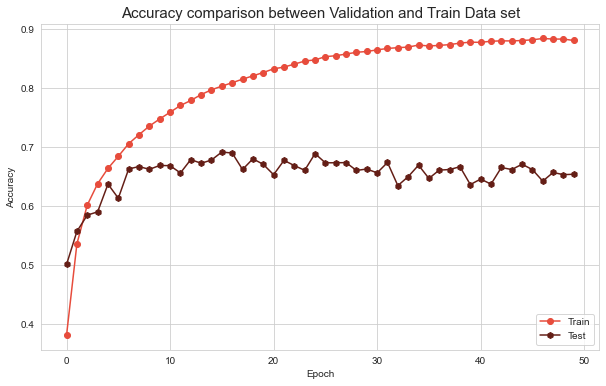

The model is being evaluated
313/313 - 1s - loss: 2.2770 - accuracy: 0.6538 - 775ms/epoch - 2ms/step
The accuracy of the model is:
0.6538000106811523


In [128]:

plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
print("The model is being evaluated")
test_loss, test_acc = model.evaluate(X_test2, y_test2, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

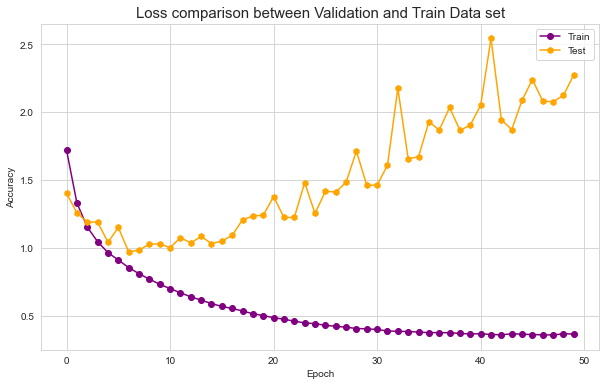

The loss of the model is:
2.277005434036255


In [129]:

plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print("The loss of the model is:")
print(test_loss)

Based on the graph, you can see that it is overfitting because val_loss kept increasing towards the end. Therefore in order to tackle the over fitting, i have decided to increase the number of kernal to 128 instead of 64.

In [68]:
model2 = Sequential()

In [69]:
#  Convolution + padding

model2.add(Conv2D(32, (3, 3), input_shape = (32,32,1), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
model2.add(Flatten())

model2.add(Dense(64, activation='relu'))

model2.add(Dense(units = 10, activation = 'softmax'))

In [70]:
model2.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [74]:
batch_size = 32
m2=model2.fit(X_train2, y_train2,
          batch_size=batch_size,
          epochs=50,
          validation_data=(X_test2, y_test2),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.6822 - accuracy: 0.4003 - val_loss: 1.3951 - val_accuracy: 0.5002
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2680 - accuracy: 0.5605 - val_loss: 1.7127 - val_accuracy: 0.4268
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0794 - accuracy: 0.6274 - val_loss: 1.0739 - val_accuracy: 0.6283
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9635 - accuracy: 0.6676 - val_loss: 1.0662 - val_accuracy: 0.6378
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8763 - accuracy: 0.6983 - val_loss: 1.0376 - val_accuracy: 0.6561
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8063 - accuracy: 0.7238 - val_loss: 1.0057 - val_accuracy: 0.6644
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7449 - accuracy: 0.7426 - val_loss: 0.9603 -

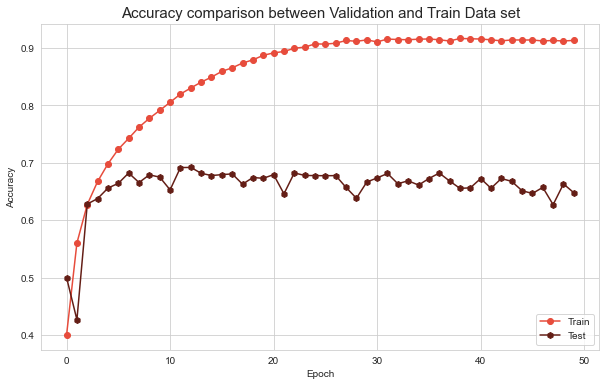

313/313 - 1s - loss: 3.1442 - accuracy: 0.6480 - 944ms/epoch - 3ms/step
The accuracy of the model is:
0.6480000019073486


In [123]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test2, verbose=2)
print("The accuracy of the model is:")
print(test_acc2)

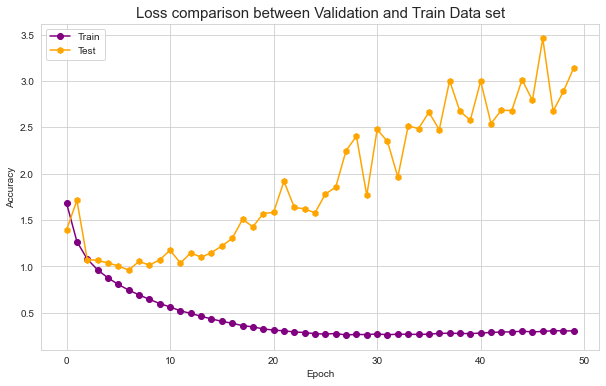

3.1441562175750732


In [125]:

plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="Purple",marker='o')
plt.plot(m2.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(test_loss2)

As you can see, changing to the number of kernal to 128 didnt work, the val_loss got worst. The next thing i will do is Image Augmentation taught in lecture to try and improve the val_loss

#### Image Augmentation

In [105]:
# Initialising the CNN
model4 = Sequential()

In [106]:
#  Convolution + padding

model4.add(Conv2D(32, (3, 3), input_shape = (32,32,1), activation = 'relu'))
model4.add(MaxPool2D(pool_size = (2, 2)))

model4.add(Conv2D(64, (3, 3), activation = 'relu'))
model4.add(MaxPool2D(pool_size = (2, 2)))

model4.add(Conv2D(64, (3, 3), activation = 'relu'))
model4.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
model4.add(Flatten())

model4.add(Dense(64, activation='relu'))

model4.add(Dense(units = 10, activation = 'softmax'))

In [108]:
model4.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [137]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness
datagen.fit(X_train2)

In [109]:
aug_m = model4.fit_generator(datagen.flow(X_train2, y_train2, batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=50,
                        validation_data=(X_test2, y_test2))

Epoch 1/50


C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\3722437219.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  aug_m = model4.fit_generator(datagen.flow(X_train2, y_train2, batch_size=batch_size),


1562/1562 [==============================] - 22s 14ms/step - loss: 2.3025 - accuracy: 0.1012 - val_loss: 2.3171 - val_accuracy: 0.1125
Epoch 2/50
1562/1562 [==============================] - 23s 15ms/step - loss: 2.3011 - accuracy: 0.1015 - val_loss: 2.3816 - val_accuracy: 0.1004
Epoch 3/50
1562/1562 [==============================] - 22s 14ms/step - loss: 2.3015 - accuracy: 0.0999 - val_loss: 2.3020 - val_accuracy: 0.1007
Epoch 4/50
1562/1562 [==============================] - 22s 14ms/step - loss: 2.3009 - accuracy: 0.1015 - val_loss: 2.3050 - val_accuracy: 0.1138
Epoch 5/50
1562/1562 [==============================] - 22s 14ms/step - loss: 2.3012 - accuracy: 0.1004 - val_loss: 2.3401 - val_accuracy: 0.0997
Epoch 6/50
1562/1562 [==============================] - 23s 14ms/step - loss: 2.3009 - accuracy: 0.1004 - val_loss: 2.3478 - val_accuracy: 0.0999
Epoch 7/50
1562/1562 [==============================] - 23s 14ms/step - loss: 2.3007 - accuracy: 0.0998 - val_loss: 2.3077 - val_accura

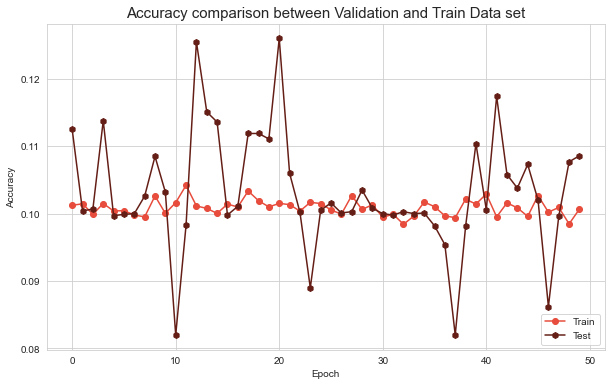

313/313 - 1s - loss: 2.3016 - accuracy: 0.1086 - 867ms/epoch - 3ms/step
The accuracy of the model is:
0.10859999805688858


In [122]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(aug_m.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(aug_m.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
test_loss4, test_acc4 = model4.evaluate(X_test2, y_test2, verbose=2)
print("The accuracy of the model is:")
print(test_acc4)

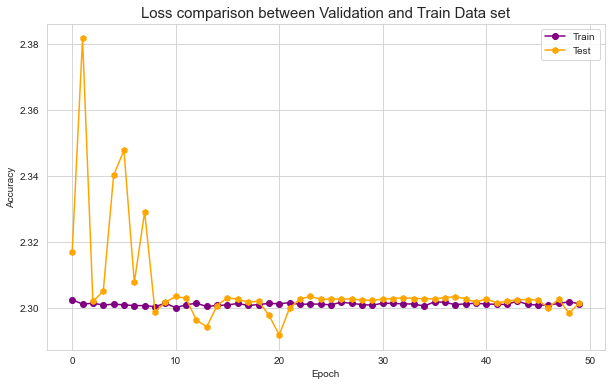

2.301626205444336


In [121]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(aug_m.history['loss'],color="Purple",marker='o')
plt.plot(aug_m.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(test_loss4)

Based on the graph, the model is not learning at all, maybe because of the overfitting problem hence I will try and add drop outlayer and do batch normalization to prevent overfitting

#### Adding Dropout Layer and batch normalization

In [98]:
model6 = Sequential()

In [99]:
#  Convolution + padding

model6.add(Conv2D(32, (3, 3), input_shape = (32,32,1), activation = 'relu'))
model6.add(MaxPool2D(pool_size = (2, 2)))


model6.add(Conv2D(64, (3, 3), activation = 'relu'))
model6.add(MaxPool2D(pool_size = (2, 2)))

model6.add(Conv2D(64, (3, 3), activation = 'relu'))
model6.add(MaxPool2D(pool_size = (2, 2)))

#Batch Normalization
model6.add(BatchNormalization())
#  Flattening
model6.add(Flatten())


model6.add(Dense(64, activation='relu'))
#Dropout Layer
model6.add(Dropout(0.5))

model6.add(Dense(units = 10, activation = 'softmax'))

In [100]:
model6.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [101]:
batch_size = 32
m6=model6.fit(X_train2, y_train2,
          batch_size=batch_size,
          epochs=50,
          validation_data=(X_test2, y_test2),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6779 - accuracy: 0.4008 - val_loss: 1.5074 - val_accuracy: 0.4839
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3740 - accuracy: 0.5211 - val_loss: 2.8635 - val_accuracy: 0.2789
Epoch 3/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2990 - accuracy: 0.5523 - val_loss: 1.5221 - val_accuracy: 0.5079
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2477 - accuracy: 0.5701 - val_loss: 1.3711 - val_accuracy: 0.5392
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2128 - accuracy: 0.5832 - val_loss: 3.2127 - val_accuracy: 0.3576
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1835 - accuracy: 0.5927 - val_loss: 1.9936 - val_accuracy: 0.4320
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1536 - accuracy: 0.6059 - val_loss: 2.4131 - val_ac

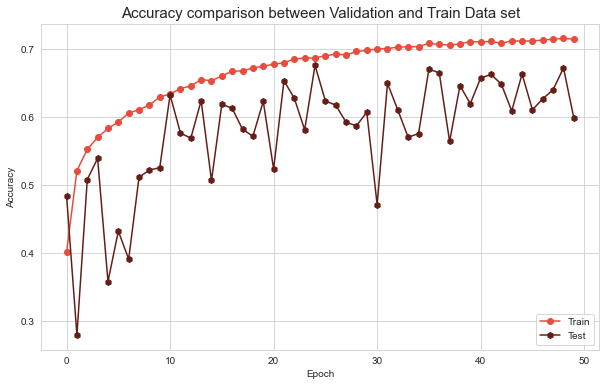

In [102]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m6.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m6.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

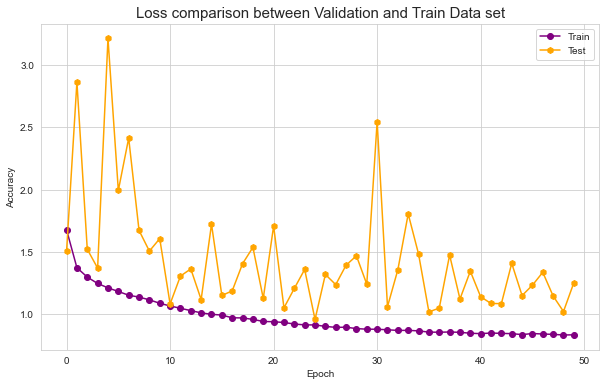

In [103]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m6.history['loss'],color="Purple",marker='o')
plt.plot(m6.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

From the graph we can notice that its oscaliation is a little high, therefore in order to counter it I will change the number of kernal to 128 instead of 64

In [147]:
model6_5 = Sequential()

In [148]:
#  Convolution + padding

model6_5.add(Conv2D(32, (3, 3), input_shape = (32,32,1), activation = 'relu'))
model6_5.add(MaxPool2D(pool_size = (2, 2)))


model6_5.add(Conv2D(64, (3, 3), activation = 'relu'))
model6_5.add(MaxPool2D(pool_size = (2, 2)))

model6_5.add(Conv2D(128, (3, 3), activation = 'relu'))
model6_5.add(MaxPool2D(pool_size = (2, 2)))

model6_5.add(BatchNormalization())
#  Flattening
model6_5.add(Flatten())

# Full ANN Connection
#model.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(128,activation='relu'))
model6_5.add(Dense(64, activation='relu'))
model6_5.add(Dropout(0.5))

# output activation depends on the number of output classes
model6_5.add(Dense(units = 10, activation = 'softmax'))

In [150]:
model6_5.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [151]:
batch_size = 32
m6_5=model6_5.fit(X_train2, y_train2,
          batch_size=batch_size,
          epochs=50,
          validation_data=(X_test2, y_test2),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6141 - accuracy: 0.4270 - val_loss: 2.4128 - val_accuracy: 0.3520
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3226 - accuracy: 0.5427 - val_loss: 1.2331 - val_accuracy: 0.5651
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2365 - accuracy: 0.5783 - val_loss: 1.1663 - val_accuracy: 0.5955
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1932 - accuracy: 0.5915 - val_loss: 1.2371 - val_accuracy: 0.5859
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1626 - accuracy: 0.6067 - val_loss: 3.0068 - val_accuracy: 0.4360
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1389 - accuracy: 0.6146 - val_loss: 6.9432 - val_accuracy: 0.3769
Epoch 7/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1231 - accuracy: 0.6204 - val_loss: 3.1917 - val

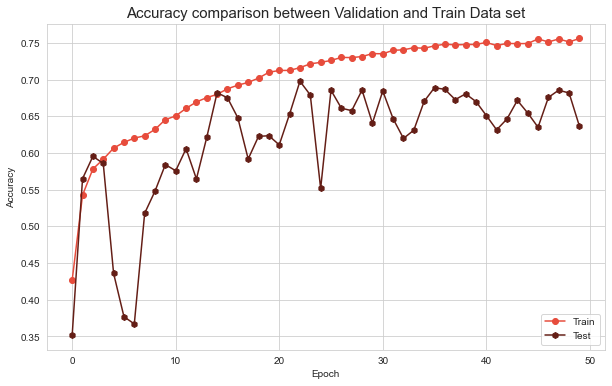

313/313 - 1s - loss: 1.5482 - accuracy: 0.6365 - 815ms/epoch - 3ms/step
The accuracy of the model is:
0.6365000009536743


In [167]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m6_5.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m6_5.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
test_loss6_5, test_acc6_5 = model6_5.evaluate(X_test2, y_test2, verbose=2)
print("The accuracy of the model is:")
print(test_acc6_5)

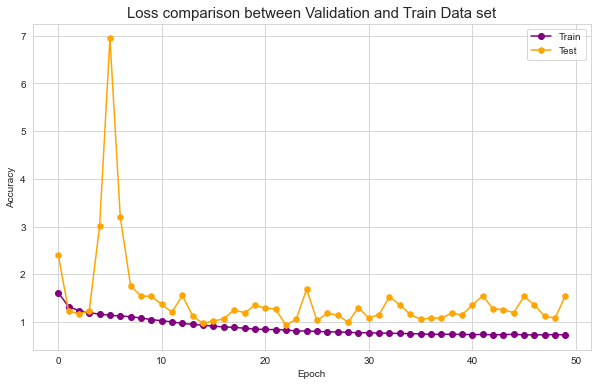

1.5482335090637207


In [168]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m6_5.history['loss'],color="Purple",marker='o')
plt.plot(m6_5.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(test_loss6_5)

The validation loss is no longer increasing which means that my model is not facing any overfitting problem anymore

### CNN For Coloured dataset

In [144]:
X_train3, X_test3, y_train3, y_test3 = coloured_X_train2, coloured_X_test2, coloured_y_train2, coloured_y_test2

In [157]:
model7 = Sequential()

In [158]:
#  Convolution + padding

model7.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model7.add(MaxPool2D(pool_size = (2, 2)))


model7.add(Conv2D(64, (3, 3), activation = 'relu'))
model7.add(MaxPool2D(pool_size = (2, 2)))

model7.add(Conv2D(128, (3, 3), activation = 'relu'))
model7.add(MaxPool2D(pool_size = (2, 2)))

#Batch Normalization
model7.add(BatchNormalization())
#  Flattening
model7.add(Flatten())

model7.add(Dense(64, activation='relu'))
#Dropout Layer
model7.add(Dropout(0.5))

model7.add(Dense(units = 10, activation = 'softmax'))

In [159]:
model7.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [160]:
batch_size = 32
m7=model7.fit(X_train3, y_train3,
          batch_size=batch_size,
          epochs=50,
          validation_data=(X_test3, y_test3),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.5865 - accuracy: 0.4317 - val_loss: 1.4893 - val_accuracy: 0.5191
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3146 - accuracy: 0.5400 - val_loss: 2.8389 - val_accuracy: 0.3461
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2130 - accuracy: 0.5824 - val_loss: 1.5774 - val_accuracy: 0.5289
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1632 - accuracy: 0.5991 - val_loss: 1.3819 - val_accuracy: 0.5701
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1195 - accuracy: 0.6167 - val_loss: 1.3063 - val_accuracy: 0.6070
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0873 - accuracy: 0.6320 - val_loss: 1.4374 - val_accuracy: 0.5763
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0517 - accuracy: 0.6421 - val_loss: 1.6709 -

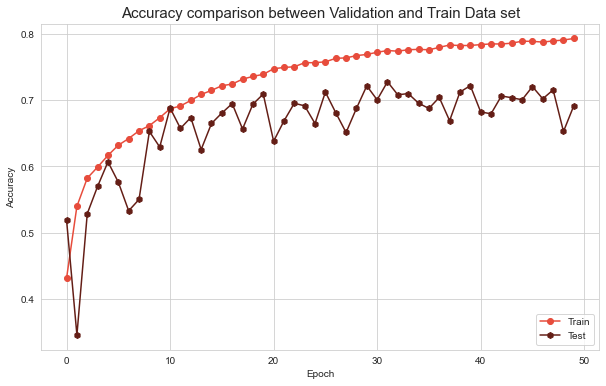

The model is being evaluated
313/313 - 1s - loss: 1.1954 - accuracy: 0.6916 - 868ms/epoch - 3ms/step
The accuracy of the model is:
0.6916000247001648


In [165]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m7.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m7.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
print("The model is being evaluated")
test_loss7, test_acc7 = model7.evaluate(X_test3, y_test3, verbose=2)
print("The accuracy of the model is:")
print(test_acc7)

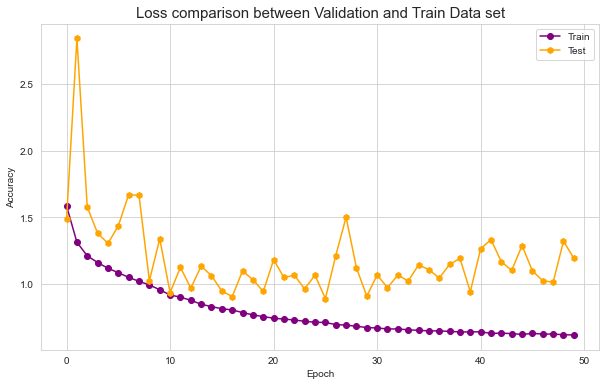

1.1954011917114258


In [166]:

plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m7.history['loss'],color="Purple",marker='o')
plt.plot(m7.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(test_loss7)

Black and white:
Accuracy: 0.6365000009536743
Validation Loss: 1.5482335090637207

Coloured test images:
Accuracy: 0.6916000247001648
Validation Loss: 1.1954011917114258

The CNN model for coloured test images is better compared to the black and white because it has higher accuracy and lower validation loss. Why is it better, it might be because coloured images has 3 dimensions RGB while black and white only has 1 which might caused the better in results. Having coloured images give more information, but does having colours help in predicting our labels? To be honest I dont think so because we are predicting the label based on the images like planes, cats or dog. The only resonable explaination i can think of is because it has more dimensions which give more information to help in computing the model and give a better accuracy and validation loss.